<a href="https://colab.research.google.com/github/varun2407/Rainfall_Visualization/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import keras

In [5]:
!wget https://www.dropbox.com/s/g0fe9evwyep6icu/CS410CatsAndDogz.zip?e=1&dl=1

--2024-03-10 22:17:12--  https://www.dropbox.com/s/g0fe9evwyep6icu/CS410CatsAndDogz.zip?e=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/g0fe9evwyep6icu/CS410CatsAndDogz.zip [following]
--2024-03-10 22:17:12--  https://www.dropbox.com/s/raw/g0fe9evwyep6icu/CS410CatsAndDogz.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca3a13aded8f44cc312a16e275e.dl.dropboxusercontent.com/cd/0/inline/CO1ZsSSqYlCdve1N65AlxqenUi44r3N0uaj_PCWGCS8-frZ4Vg-TefNJWrChn8mYzgF9tArCwaiEqfuvcSyBjLPcPixe5WIWI7L28VrfWhNWhH2xshuv3mEvPUPnkgCqoTU/file# [following]
--2024-03-10 22:17:13--  https://uca3a13aded8f44cc312a16e275e.dl.dropboxusercontent.com/cd/0/inline/CO1ZsSSqYlCdve1N65AlxqenUi44r3N0uaj_PCWGCS8-frZ4Vg-TefNJWrChn8mYzgF9tArCwaiEqfuvcSyBjLPcPixe5WI

In [6]:
!unzip /content/CS410CatsAndDogz.zip?e=1

Streaming output truncated to the last 5000 lines.
  inflating: CS410CatsAndDogz/train/dogs/dog.9-1994.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.124.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.115.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.110.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.99.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.98.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.97.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.95.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.93.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.92.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.91.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.86.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.75.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.72.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.71.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.61.jpg  
  inflating: CS410CatsAndDogz/train/dogs/dog.59.jpg  
  inflating: CS410CatsAn

In [7]:
DATAFOLDER = 'CS410CatsAndDogz/'

In [8]:
train_generator = keras.preprocessing.image.ImageDataGenerator( rescale = 1./255 )
X_train = train_generator.flow_from_directory(DATAFOLDER + 'train',
                                              target_size=(244,244))

Found 5998 images belonging to 2 classes.


In [9]:
test_generator = keras.preprocessing.image.ImageDataGenerator( rescale = 1./255 )
X_test = test_generator.flow_from_directory(DATAFOLDER + 'test',
                                              target_size=(244,244))

Found 2998 images belonging to 2 classes.


In [10]:
first_image = X_train[0][0][0]
first_label = X_train[0][1][0]

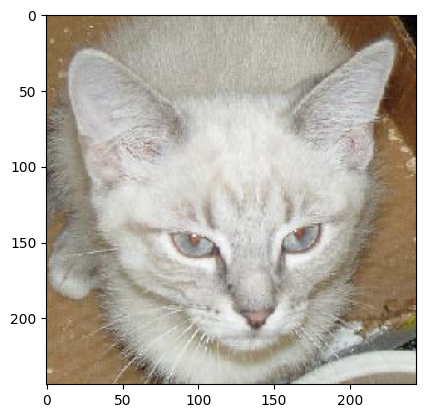

In [11]:
imshow(first_image)

In [12]:
first_label ### CATS = first element 1, DOGS = second element 1 -> y_train

array([1., 0.], dtype=float32)

In [13]:
first_image.shape

(244, 244, 3)

In [14]:
NUMBER_OF_CLASSES = 2

In [15]:
base_model = keras.applications.inception_v3.InceptionV3(weights = 'imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [16]:
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
predictions = keras.layers.Dense( NUMBER_OF_CLASSES, activation='softmax')(x)

In [17]:
# set up our own model with inceptionv3 base and a 1024-neuron dense layer for
# 2 output classes
model = keras.models.Model( inputs=base_model.input, outputs=predictions )

In [18]:
for layer in base_model.layers:
  layer.trainable = False

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [20]:
model.fit(X_train, epochs=5)

Epoch 1/5
188/188 [==============================] - 30s 105ms/step - loss: 0.3825
Epoch 2/5
188/188 [==============================] - 19s 101ms/step - loss: 0.0630
Epoch 3/5
188/188 [==============================] - 20s 108ms/step - loss: 0.0443
Epoch 4/5
188/188 [==============================] - 18s 93ms/step - loss: 0.0242
Epoch 5/5
188/188 [==============================] - 18s 95ms/step - loss: 0.0172


In [21]:
# for i, layer in enumerate(base_model.layers):
  # print(i, layer.name)

In [22]:
for layer in model.layers[:249]: # this number is specific to inception v3
  layer.trainable = False
for layer in model.layers[249:]:
  layer.trainable = True

In [23]:
model.fit(X_train, epochs=3)

Epoch 1/3
188/188 [==============================] - 20s 106ms/step - loss: 0.0180
Epoch 2/3
188/188 [==============================] - 20s 103ms/step - loss: 0.0070
Epoch 3/3
188/188 [==============================] - 17s 91ms/step - loss: 2.2375e-04


In [24]:
model.evaluate( X_test )

94/94 [==============================] - 13s 124ms/step - loss: 0.0797


0.0796910747885704

In [25]:
test_image = X_test[5][0][21:22]

In [26]:
test_image.shape

(1, 244, 244, 3)

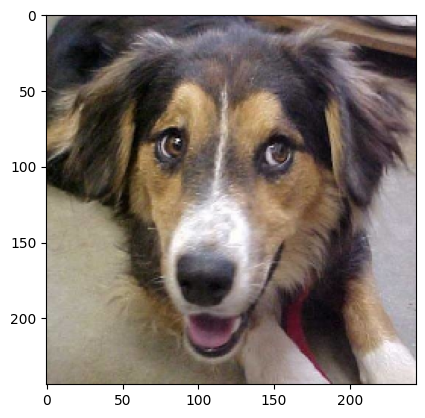

In [27]:
imshow(test_image[0])

In [28]:
prediction = model.predict(test_image)

1/1 [==============================] - 3s 3s/step


In [29]:
prediction

array([[2.1306813e-10, 1.0000000e+00]], dtype=float32)

In [30]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 46.5 MB/s eta 0:00:00


In [31]:
import tensorflowjs as tfjs

In [32]:
tfjs.converters.save_keras_model(model, 'web/')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
!zip -r web.zip web/

  adding: web/ (stored 0%)
  adding: web/group1-shard16of23.bin (deflated 7%)
  adding: web/group1-shard23of23.bin (deflated 7%)
  adding: web/group1-shard3of23.bin (deflated 7%)
  adding: web/group1-shard18of23.bin (deflated 7%)
  adding: web/group1-shard21of23.bin (deflated 7%)
  adding: web/group1-shard22of23.bin (deflated 7%)
  adding: web/group1-shard4of23.bin (deflated 7%)
  adding: web/group1-shard6of23.bin (deflated 7%)
  adding: web/group1-shard17of23.bin (deflated 7%)
  adding: web/group1-shard15of23.bin (deflated 7%)
  adding: web/group1-shard1of23.bin (deflated 7%)
  adding: web/group1-shard20of23.bin (deflated 7%)
  adding: web/group1-shard5of23.bin (deflated 7%)
  adding: web/group1-shard14of23.bin (deflated 7%)
  adding: web/group1-shard2of23.bin (deflated 7%)
  adding: web/group1-shard13of23.bin (deflated 7%)
  adding: web/model.json (deflated 96%)
  adding: web/group1-shard11of23.bin (deflated 7%)
  adding: web/group1-shard9of23.bin (deflated 7%)
  adding: web/group1-s

In [34]:
from google.colab import files

In [35]:
files.download('web.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
!wget https://cs410.net/catdog.png

--2024-03-10 22:31:27--  https://cs410.net/catdog.png
Resolving cs410.net (cs410.net)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to cs410.net (cs410.net)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1786837 (1.7M) [image/png]
Saving to: ‘catdog.png’

catdog.png          100%[===================>]   1.70M  --.-KB/s    in 0.03s   

2024-03-10 22:31:27 (53.0 MB/s) - ‘catdog.png’ saved [1786837/1786837]



In [37]:
catdog = keras.preprocessing.image.load_img('catdog.png', target_size=(244,244))

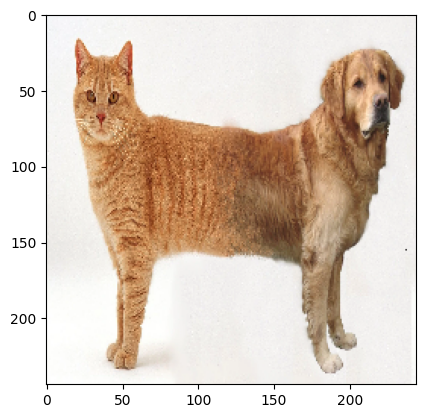

In [38]:
imshow(catdog)

In [39]:
catdog = np.array(catdog)

In [40]:
catdog.shape

(244, 244, 3)

In [41]:
test_image.shape

(1, 244, 244, 3)

In [42]:
catdog = catdog.reshape(1, catdog.shape[0], catdog.shape[1], 3).astype(float)

In [43]:
catdog.shape

(1, 244, 244, 3)

In [44]:
catdog /= 255

In [45]:
prediction = model.predict(catdog)

1/1 [==============================] - 0s 68ms/step


In [46]:
prediction

array([[0.00687532, 0.99312466]], dtype=float32)